In [25]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plot

In [31]:
# Importing the data set
df = pd.read_csv('/content/data.csv')
pd.set_option('display.max_rows', df.shape[0]+1)
print(df)

                                               Sentence Sentiment
0     The GeoSolutions technology will leverage Bene...  positive
1     $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2     For the last quarter of 2010 , Componenta 's n...  positive
3     According to the Finnish-Russian Chamber of Co...   neutral
4     The Swedish buyout firm has sold its remaining...   neutral
5       $SPY wouldn't be surprised to see a green close  positive
6     Shell's $70 Billion BG Deal Meets Shareholder ...  negative
7     SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...  negative
8     Kone 's net sales rose by some 14 % year-on-ye...  positive
9     The Stockmann department store will have a tot...   neutral
10    Circulation revenue has increased by 5 % in Fi...  positive
11    $SAP Q1 disappoints as #software licenses down...  negative
12    The subdivision made sales revenues last year ...  positive
13             Viking Line has canceled some services .   neutral
14    Ahls

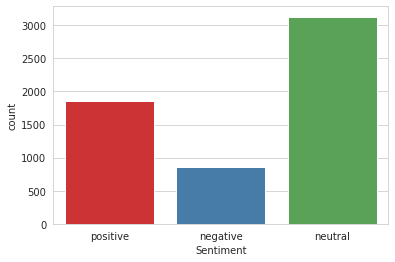

In [27]:
# Plotting the counts
plot.figure()
chart = sns.countplot(x= "Sentiment", data= df, palette= "Set1")
plot.show()

In [28]:
# We'll find duplicate sentences to make our data set better
# finding duplicate sentences
df[df['Sentence'].duplicated()]

,Sentence,Sentiment
266,Finnish GeoSentric 's net sales decreased to E...,neutral
283,Sales in Finland decreased by 10.5 % in Januar...,negative
349,Full-year operating result for 2008 was 3.6 mi...,negative
387,"Making matters more difficult , the company sa...",negative
496,"Antti Orkola , president of Kemira GrowHow 's ...",negative
...,...,...
5827,"( ADPnews ) - Oct 21 , 2009 - Finland-based IT...",negative
5831,Finnish developer and manufacturer of mobile p...,negative
5832,Operating profit fell to EUR 38.1 mn from EUR ...,negative
5837,RISING costs have forced packaging producer Hu...,negative


In [34]:
# Indices of duplicate sentences
duplicate_indices = df[df['Sentence'].duplicated()].index.to_list()

# printing each set of duplicate sentences
for index in duplicate_indices:
    print(df[df['Sentence'] == df['Sentence'].loc[index]])
    print('\n\n')

                                              Sentence Sentiment
66   Finnish GeoSentric 's net sales decreased to E...  negative
266  Finnish GeoSentric 's net sales decreased to E...   neutral



                                              Sentence Sentiment
163  Sales in Finland decreased by 10.5 % in Januar...   neutral
283  Sales in Finland decreased by 10.5 % in Januar...  negative



                                              Sentence Sentiment
195  Full-year operating result for 2008 was 3.6 mi...   neutral
349  Full-year operating result for 2008 was 3.6 mi...  negative



                                              Sentence Sentiment
169  Making matters more difficult , the company sa...   neutral
387  Making matters more difficult , the company sa...  negative



                                              Sentence Sentiment
201  Antti Orkola , president of Kemira GrowHow 's ...   neutral
496  Antti Orkola , president of Kemira GrowHow 's ...  negative



          

In [35]:
# Dropping the duplicate sentences with neutral sentiment
for index in duplicate_indices:
    temp = df[df['Sentence'] == df['Sentence'].loc[index]]
    dup_idx = temp[temp['Sentiment'] == 'neutral'].index[0]
    df = df.drop(index=dup_idx)
df.reset_index() 
# Checking if duplicate sentences are dropped
df[df['Sentence'].duplicated()]

,Sentence,Sentiment


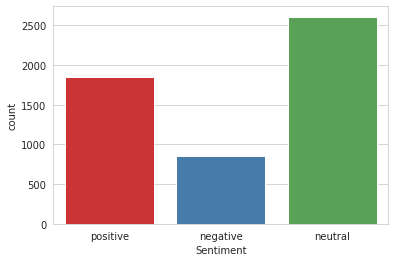

In [37]:
# plotting the class distribution after droping duplicates
plot.figure()
chart = sns.countplot(x="Sentiment", data=df, palette="Set1")
plot.show()

In [38]:
df.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [40]:
# save the cleaned dataset
df.to_csv('/content/data_anujot.csv', index=False)